In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data

In [2]:
path = "../data_filtered/place_all.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,pixel_color,coordinate
0,0,4,2022-04-04 00:55:16.307 UTC,#94B3FF,"49,1478"
1,1,6,2022-04-04 00:55:34.898 UTC,#94B3FF,"111,1582"
2,2,17,2022-04-04 00:58:28.548 UTC,#6A5CFF,"216,1678"
3,3,28,2022-04-04 01:01:14.002 UTC,#009EAA,"105,1651"
4,4,29,2022-04-04 01:01:19.418 UTC,#6A5CFF,"154,1800"


In [3]:
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)

In [4]:
# change to datetime format
#df["timestamp"] = pd.to_datetime(df["timestamp"])

In [5]:
# add x, y coordinates for each pixel

def get_x(coord):
    return int(coord.split(",")[0])

def get_y(coord):
    return int(coord.split(",")[1])

df["x"] = df["coordinate"].apply(get_x)
df["y"] = df["coordinate"].apply(get_y)

df.head()

,timestamp,pixel_color,coordinate,x,y
0,2022-04-04 00:55:16.307 UTC,#94B3FF,"49,1478",49,1478
1,2022-04-04 00:55:34.898 UTC,#94B3FF,"111,1582",111,1582
2,2022-04-04 00:58:28.548 UTC,#6A5CFF,"216,1678",216,1678
3,2022-04-04 01:01:14.002 UTC,#009EAA,"105,1651",105,1651
4,2022-04-04 01:01:19.418 UTC,#6A5CFF,"154,1800",154,1800


# count changes per pixel and plot

In [6]:
df_count = df.groupby(by=["x", "y"], as_index=False).count()[["x", "y", "coordinate"]]\
    .rename(columns={"coordinate" : "count"})
df_count.head()

,x,y,count
0,0,1470,1061
1,0,1471,363
2,0,1472,314
3,0,1473,253
4,0,1474,185


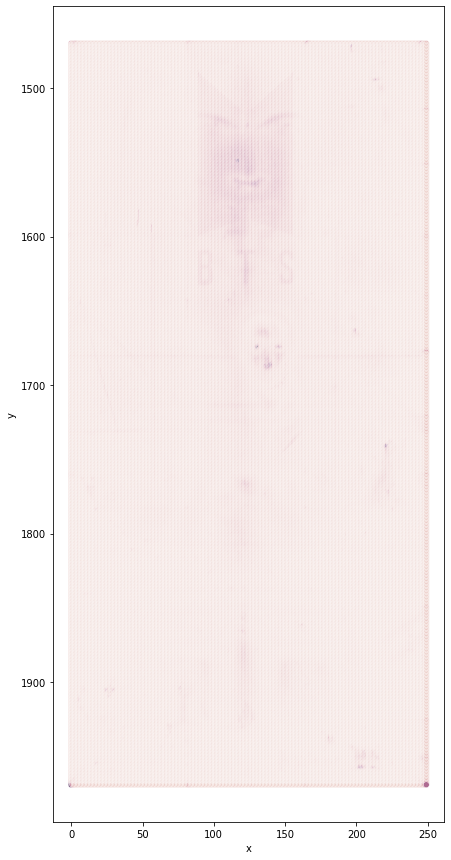

In [8]:
plt.figure(figsize=(7, 15))
sns.scatterplot(data=df_count, x="x", y="y", hue="count", legend=False);
lim_1, lim_2 = plt.gca().get_ylim()
plt.gca().set_ylim(lim_2, lim_1);